In [215]:
import numpy as np
arr = np.array

import pandas as pd
import matplotlib.pyplot as plt
import random

### Choose randomly for given fraction of time and then select the best arm

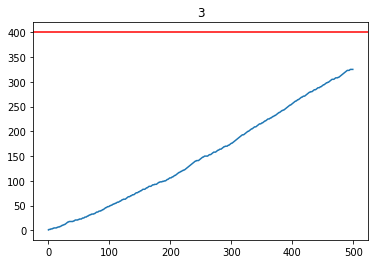

In [212]:
class Bernoulli_process:
    
    def __init__(self, num_arms, probs):
        self.num_arms = num_arms
        self.probs = probs
        
    def generate_bernoulli(self, choice):
        return np.random.binomial(1, self.probs[choice])
    
class Player:
    
    def __init__(self, name):
        self.name = name
        self.payoffs = pd.DataFrame(columns=['Arm', 'Reward'])
        self.payoffs.index.name = 'round'
        
    def explore_exploit(self, len_explore = 0.1):
        
        # explore phase
        for c in range(int(len_explore*T)):
            choice = np.random.choice(process.num_arms, size=1)[0]
            reward = process.generate_bernoulli(choice)
            player1.payoffs.loc[c] = [choice, reward]
            
        best_arm = player1.payoffs.groupby('Arm').sum().sort_values(by='Reward', ascending=False).index[0]
        self.best_arm = best_arm
        
        # exploit phase
        for c in range(int(T*len_explore), T):
            player1.payoffs.loc[c] = [best_arm, process.generate_bernoulli(best_arm)]
            

process = Bernoulli_process(5, arr([0.2, 0.8, 0.3, 0.7, 0.5]))
player1 = Player('Pepa')

T = 500
player1.explore_exploit(len_explore=0.3)

# plot regret
max_reward = process.probs.max()*T
cum_reward = player1.payoffs.Reward.cumsum()

plt.axhline(max_reward, color='r')
plt.plot(range(T), cum_reward)
plt.title(f'{player1.best_arm}')
plt.show()

# Advertisments
## Random selection

1300


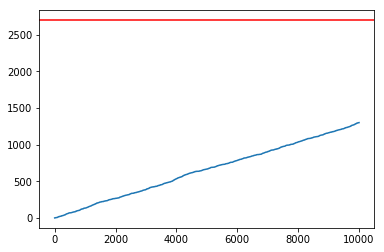

In [278]:
df = pd.read_csv('Ads_Optimisation.csv')
N, d = df.shape

ads_selected = []
rewards = np.empty(N)
total_reward = 0

for n in range(N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    
    reward = df.values[n, ad]
    rewards[n] = reward
    total_reward += reward
    
print(total_reward)

max_reward = df['Ad 5'].sum()

plt.axhline(max_reward, color='red')
plt.plot(range(N), rewards.cumsum())
plt.show()

In [246]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [238]:
pd.Series(ads_selected).tail(1000).head()

9000    3
9001    2
9002    0
9003    2
9004    9
dtype: int64

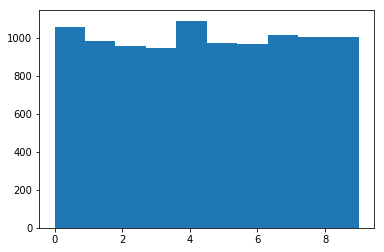

In [279]:
plt.hist(ads_selected)
plt.show()

## Upper confidence bound

In [282]:
data = pd.read_csv('Ads_Optimisation.csv')

N, d = data.shape

df = pd.DataFrame(columns=['Arm', 'reward'])

,Arm,reward


In [286]:
ads_selected = []

numbers_of_selections = [0]*d
sums_of_reward = [0]*d

total_reward = 0

for n in range(N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(d):
        if numbers_of_selections[i]>0:
            average_reward = sums_of_reward[i]/numbers_of_selections[i]
            δi = np.sqrt(2*np.log(n+1))/numbers_of_selections[i]
            upper_bound = average_reward + δi
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = data.values[n, ad]
    
    df.loc[n] = arr([ad, reward])
    sums_of_reward[ad] += reward
    total_reward += reward

df.head()

,Arm,reward
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


[6, 4, 3, 12, 2556, 0, 4, 27, 0, 3]

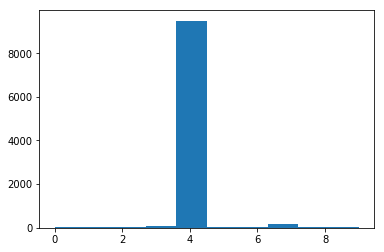

In [276]:
plt.hist(ads_selected)
plt.show()

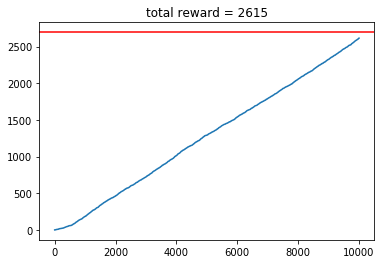

In [264]:
plt.axhline(max_reward, color='red')
plt.plot(range(N), rewards.cumsum())
plt.title(f'total reward = {total_reward}')
plt.show()